#### Задание

При фиксированном seed=42 поразбирайтесь и поэкспериментируйте с параметрами алгоритма дифференциальной эволюции: strategy, popsize, tol, mutation, recombination и updating.

Постройте графики количества итераций оптимизации функции ackley от значения параметра.

In [1]:
import numpy as np
from scipy.optimize import differential_evolution

In [2]:
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-10, 10), (-10, 10)]
result = differential_evolution(ackley, bounds, seed=42, maxiter=40)
result

     fun: 5.333302244281413e-09
     jac: array([-2.49705963,  2.80798922])
 message: 'Maximum number of iterations has been exceeded.'
    nfev: 1290
     nit: 40
 success: False
       x: array([-5.61761553e-10,  1.79998240e-09])

In [36]:
n_iter_popsize = []
popsize = list(range(1, 50))

for i in popsize:
    result = differential_evolution(ackley, bounds, seed=42, popsize=i, workers=-1, updating='deferred')
    print('\b', end='')
    print('\b', end='')
    print(i, end='')
    n_iter_popsize.append(result.nit)
    if not result.success:
        print('No convergence', i)

49

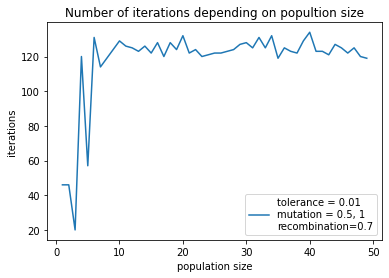

In [55]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
ax_1 = ax.plot(popsize, n_iter_popsize, label='tolerance = 0.01\nmutation = 0.5, 1\nrecombination=0.7')
ax.set_xlabel('population size')
ax.set_ylabel('iterations')
plt.legend()
t = plt.title('Number of iterations depending on popultion size')

In [38]:
# tol = [0.31695]
tols = [0.0001, 0.001, 0.01, 0.1, 0.3, 0.4, 0.5, 1]
n_iter_tol = []
for i in tols:
    result = differential_evolution(ackley, bounds, popsize=15, seed=42, tol=i) # , workers=-1, updating='deferred')
    n_iter_tol.append(result.nit)
    
    if not result.success:
        print('No convergence', i)

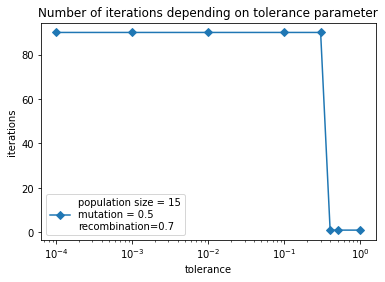

In [54]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax_1 = ax.semilogx(
    tols,
    n_iter_tol,
    label='population size = 15\nmutation = 0.5, 1\nrecombination=0.7',
    marker='D'
)
ax.set_xlabel('tolerance')
ax.set_ylabel('iterations')
plt.legend()
t = plt.title('Number of iterations depending on tolerance parameter')

In [52]:
mutations = np.linspace(0.01, 1.99, 500)
n_iter_mutation = []
for i in mutations:
    result = differential_evolution(ackley, bounds, seed=42, mutation=i)
    n_iter_mutation.append(result.nit)
    
    if not result.success:
        print('No convergence', i)

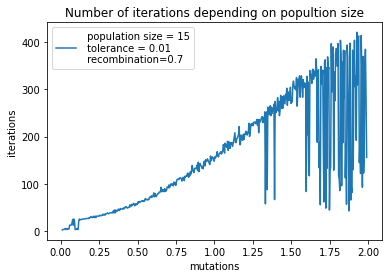

In [53]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax_1 = ax.plot(
    mutations,
    n_iter_mutation,
    label=' population size = 15\n tolerance = 0.01\n recombination=0.7',
    # marker='o'
)
ax.set_xlabel('mutations')
ax.set_ylabel('iterations')
plt.legend()
t = plt.title('Number of iterations depending on mutation parameter')

In [60]:
recombinations = np.linspace(0, 1, 30)
n_iter_recombination = []
for i in recombinations:
    result = differential_evolution(ackley, bounds, seed=42, recombination=i)
    n_iter_recombination.append(result.nit)
    
    if not result.success:
        print('No convergence', i)

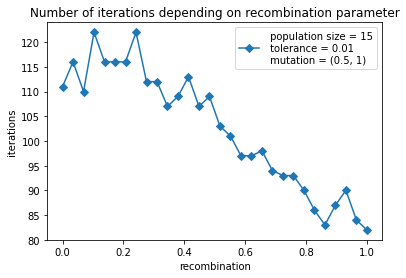

In [62]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax_1 = ax.plot(
    recombinations,
    n_iter_recombination,
    label=' population size = 15\n tolerance = 0.01\n mutation = (0.5, 1)',
    marker='D'
)
ax.set_xlabel('recombination')
ax.set_ylabel('iterations')
plt.legend()
t = plt.title('Number of iterations depending on recombination parameter')

In [64]:
updatings = ['immediate', 'deferred']
n_iter_updating = []

for i in updatins:
    result = differential_evolution(ackley, bounds, seed=42, updating=i)
    n_iter_updating.append(result.nit)
    
    if not result.success:
        print('No convergence', i)


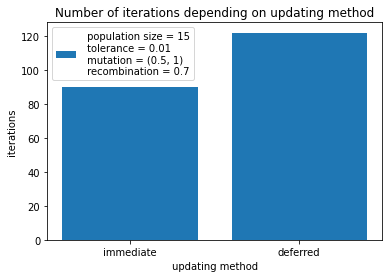

In [70]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax_1 = ax.bar(
    [0, 1],
    n_iter_updating,
    label=' population size = 15\n tolerance = 0.01\n mutation = (0.5, 1) \n recombination = 0.7',
)
plt.xticks([0, 1], updatings)
ax.set_xlabel('updating method')
ax.set_ylabel('iterations')
plt.legend()
t = plt.title('Number of iterations depending on updating method')

In [89]:
strategies = [
    'best1bin', 'best1exp', 'rand1exp',
    'randtobest1exp', 'currenttobest1exp',
    'best2exp', 'rand2exp', 'randtobest1bin',
    'currenttobest1bin', 'best2bin', 
    'rand2bin', 'rand1bin'
]

n_iter_strategy = []

for i in strategies:
    result = differential_evolution(ackley, bounds, seed=42, strategy=i, maxiter=2000)
    n_iter_strategy.append(result.nit)
    
    if not result.success:
        print('No convergence', i)
        n_iter_strategy[-1] = np.nan


No convergence currenttobest1exp
No convergence currenttobest1bin


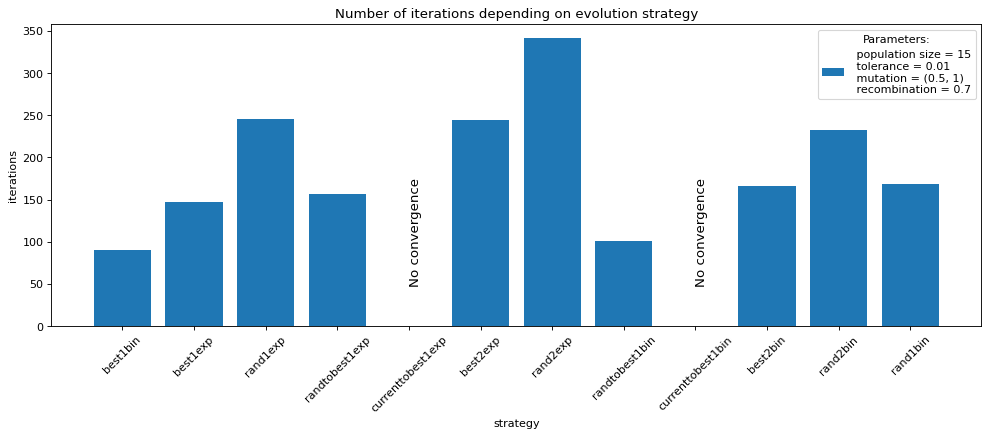

In [90]:
x = list(range(len(strategies)))

fig = plt.figure(figsize=(15, 5), dpi=80)
ax = fig.add_subplot(111)
ax_1 = ax.bar(
    x,
    n_iter_strategy,
    label=' population size = 15\n tolerance = 0.01\n mutation = (0.5, 1) \n recombination = 0.7',
)
ax.text(4, 50, 'No convergence', rotation=90, fontsize='large')
ax.text(8, 50, 'No convergence', rotation=90, fontsize='large')
plt.xticks(x, strategies, rotation=45)
ax.set_xlabel('strategy')
ax.set_ylabel('iterations')
plt.legend(title='Parameters:')
t = plt.title('Number of iterations depending on evolution strategy')

In [9]:
strategies = [
    'best1bin', 'best1exp', 'rand1exp',
    'randtobest1exp', 'currenttobest1exp',
    'best2exp', 'rand2exp', 'randtobest1bin',
    'currenttobest1bin', 'best2bin', 
    'rand2bin', 'rand1bin'
]
 # default 15
tol = [0.001, 0.01, 0.1, 1]  # defult 0.01
mutation = [0, 0.5, 1, 1.5, 2]  # [0 .. 2], default 0.5
recombination = [0.1, 0.3, 0.5, 0.7, 0.9]  # [0 .. 1], default 0.7
updatin = ['immediate', 'deferred']

#### Допзадание

Найти множество параметров (strategy=..., ..., updating=...), которые требуют минимального количества итераций.


In [21]:
# optimization_bounds
optimize_optimization([15, 0.01, 0.5, 0.7])

57

In [108]:
strategies = [
    'best1bin', 'best1exp', 'rand1exp',
    'randtobest1exp', 'currenttobest1exp',
    'best2exp', 'rand2exp', 'randtobest1bin',
    'currenttobest1bin', 'best2bin', 
    'rand2bin', 'rand1bin'
]
updatings = ['immediate', 'deferred']

def optimize_optimization(params):
    ackley_bounds = [(-10, 10), (-10, 10)]
    result = differential_evolution(
        ackley, ackley_bounds,
        
        popsize=int(params[0]),
        tol=params[1],
        mutation=params[2],
        recombination=params[3],

        strategy=strategies[int(params[4])],
        maxiter=50,
        updating=updatings[int(params[5])],
        seed=42
    )
    return result.nit

optimization_bounds = [
    (5, 100),  # popsize
    (0.0001, 0.01),  # tol
    (0.01, 1.99),  # mutation
    (0.01, 0.99),  # recombination
    (0, 11.99),  # strategy
    (0, 1.99) # updating
]

result = differential_evolution(
    optimize_optimization,
    optimization_bounds,
    seed=42
)

In [109]:
# результаты оптимизации
result

     fun: 2.0
 message: 'Optimization terminated successfully.'
    nfev: 6217
     nit: 68
 success: True
       x: array([6.28919515e+01, 2.56598497e-03, 1.70059417e-02, 9.86643278e-01,
       9.78720676e+00, 9.74696841e-01])

Проверим количество итераций с параметрами, полученными в ходе оптимизации

In [110]:
params = [6.28919515e+01, 2.56598497e-03, 1.70059417e-02, 9.86643278e-01,
       9.78720676e+00, 9.74696841e-01]

ackley_bounds = [(-10, 10), (-10, 10)]
result_optimized = differential_evolution(
    ackley, ackley_bounds,

    popsize=int(params[0]),
    tol=params[1],
    mutation=params[2],
    recombination=params[3],

    strategy=strategies[int(params[4])],
    maxiter=15,
    updating=updatings[int(params[5])],
    seed=42
)
result_optimized

     fun: 3.574451877257719
     jac: array([ 1.42108546e-06, -1.42108546e-06])
 message: 'Optimization terminated successfully.'
    nfev: 384
     nit: 2
 success: True
       x: array([0.96847768, 0.96847762])

"Лучший" вариант получен не в глобальном минимуме.